Learning objectives:
After doing this exercise, you'll know how to do the following:

Run Colabs.
Tune the following hyperparameters:
learning rate
number of epochs
batch size
Interpret different kinds of loss curves.

In [34]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [35]:
'''Define functions that build and train a model
The following code defines two functions:

build_model(my_learning_rate), which builds an empty model.
train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.
Since you don't need to understand model building code right now, we've hidden this code cell. You may optionally double-click the headline to explore this code.'''

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model          


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [36]:
'''Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:

a plot of the feature values vs. the label values, and a line showing the output of the trained model.
a loss curve.
We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.'''

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [37]:
'''Define the dataset
The dataset consists of 12 examples. Each example consists of one feature and one label.'''

my_feature=np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label=np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - loss: 540.0062 - root_mean_squared_error: 23.2380
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 527.9509 - root_mean_squared_error: 22.9772
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 519.3367 - root_mean_squared_error: 22.7890
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 512.2017 - root_mean_squared_error: 22.6319
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 505.9247 - root_mean_squared_error: 22.4928
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 500.2179 - root_mean_squared_error: 22.3656
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 494.9213 - root_mean_squared_error: 22.2468
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 489.9355 - root_mean_squared_error: 22.1345
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 485.1937 - root_mean_squared_error: 22.0271
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 480.6492 - root_mean_squared_error: 21.9237

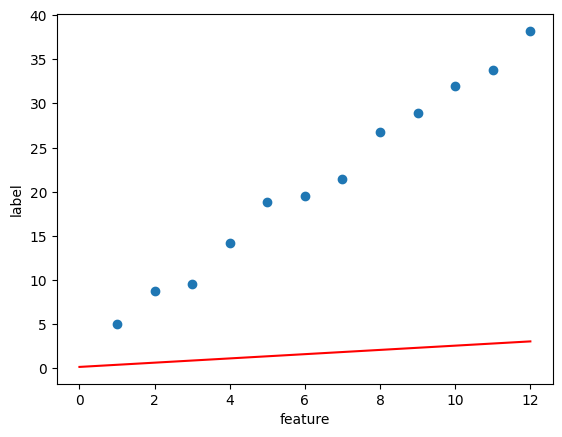

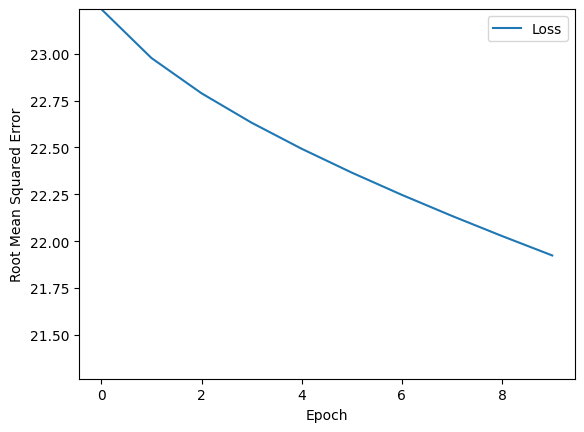

In [38]:
learning_rate=0.01
epochs=10
my_batch_size=12
my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)